# Data Visualisation with Python

The following notebook serves as an introduction to data visualization with Python training course. 

## Why Data Visualization?
Data visualization (DataViz) is an essential tool for exploring and and find insight in the data. Before jumping to complex machine learning or multivariate models, one should always take a first look at the data through simple visualization techniques. Indeed, visualization provides a unique perspective on the dataset that might in some cases allow you to detect potential challenge or specifities in your data that should be taken into account for future and in depth analysis.

## Objectives of the course
The goal of this session is to discover how to make 1D, 2D, 3D and eventually multidimensional data visualization with Python. 

We will explore three different librairies:

* Matplotlib (very similar to Matlab's syntax): classic Python library for data visualization.
* Pandas: its main purpose is to handle data frames. It also provides basic visualization modules.
* Seaborn: it provides a high-level interface to draw statistical graphics.
* Plotly: blabla


## Part 1 - Comparing Matplotlib, Pandas and Seaborn

To illustrate the differences between Matplotlib, Seaborn and Pandas, let us import a dataset about the weather in seattle from the library vega_datasets() and briefly describe it. 



In [ ]:
from vega_datasets import data
import pandas as pd

seattle_weather = data.seattle_weather()
# Check the first three rows of the dataset 
print(seattle_weather.head(3)) 

# A few statistics on the data (= summary in R)
seattle_weather.describe()

        date  precipitation  temp_max  temp_min  wind  weather
0 2012-01-01            0.0      12.8       5.0   4.7  drizzle
1 2012-01-02           10.9      10.6       2.8   4.5     rain
2 2012-01-03            0.8      11.7       7.2   2.3     rain


,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [ ]:
# Accessing one variable only by the column name
seattle_weather['precipitation'].describe()

# Extracting a sub-dataset based on the value of a column
df_sun = seattle_weather.loc[seattle_weather['weather'] == 'sun']

# Extract the month of the year from the date to create a new variable
seattle_weather['month'] = pd.DatetimeIndex(seattle_weather['date']).month_name()


In [ ]:
# Check the new column
print(seattle_weather.head(3)) 

        date  precipitation  temp_max  temp_min  wind  weather    month
0 2012-01-01            0.0      12.8       5.0   4.7  drizzle  January
1 2012-01-02           10.9      10.6       2.8   4.5     rain  January
2 2012-01-03            0.8      11.7       7.2   2.3     rain  January


### Matplotlib

Matplotlib is a library for producing publication-quality figures. It was designed from the beginning to serve two purposes: allow for interactive, cross-platform control of figures and plots; make it easy to produce static raster or vector graphics files without the need for any GUIs.

#### Online Documentation

The [matplotlib.org](https://matplotlib.org/) project website is the primary online resource for the library's documentation. It contains the example galleries, FAQs, API documentation, and tutorials.
You can take a look at the [Gallery](https://matplotlib.org/stable/gallery/index.html) to see the variety of ways one can make figures.

This tutorial is strongly inspired by this very good [tutorial](https://github.com/matplotlib/AnatomyOfMatplotlib). We will only cover the fisrt part here.


#### Basics of Matplotlib

Let's start by taking a closer look at the anatomy of a Matplolib plot by answering to the following questions. 

1. **What exactly is a Figure?** 

 The top level container for all the plot elements. It is the overall window or page that everything is drawn on. The Figure object is instantiated by calling the `figure()` function from the pyplot module. You can create multiple independent Figures. A Figure can have several other things in it, such as a title, which is a centered title to the figure. You’ll also find that you can add a legend and color bar, for example, to your Figure.

2. **What are the Axes?** 

 To the figure you add Axes. Axes object is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one Figure. The Axes contains two (or three in the case of 3D visualisation) Axis objects (x and y). Axes can have ticks, labels, etc. associated with it.


**Note** that in the following code, we import the `pyplot` module of the `matplotlib` library under the alias `plt`.
Pyplot provides the state-machine interface to the underlying plotting library in matplotlib. This means that figures and axes are implicitly and automatically created to achieve the desired plot. For example, calling `plot` from `pyplot` will automatically create the necessary figure and axes to achieve the desired plot.

In [ ]:
# Import the necessary packages and modules
import matplotlib.pyplot as plt

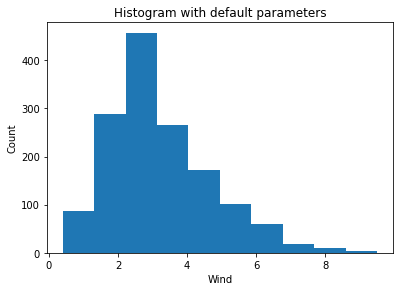

In [ ]:
# Long version (declare a new figure and add desired axes)

# Create the Figure object
fig = plt.figure()

# Add an Axe to this figure
# [0, 0, 1, 1] is the dimensions [left, bottom, width, height] of the new axes.
# Values are in 0-1 relative figure coordinates.
ax = fig.add_axes([0.5,0.5,0.8,0.8])

# Plot the distribution of the wind variable in the axe
g1 = ax.hist(x=seattle_weather['wind'])

# Add a title
ax.set_title('Histogram with default parameters')

# Add labels for the x-axis and the y-axis
ax.set_xlabel('Wind')
ax.set_ylabel('Count')

# Show the plot
plt.show()

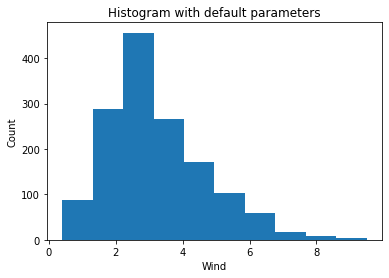

In [ ]:
# Short version (using the fact that figure and axes are automatically created)
# Make use of the built-in defaults that take care of the creation of the 
# underlying components, such as the Figure and the Axes.

# Plot the distribution of the wind using a histogram 
plt.hist(x=seattle_weather['wind'])

# Add a title
plt.title("Histogram with default parameters")

# Add labels for the x-axis and the y-axis
plt.xlabel('Wind')
plt.ylabel('Count')

# Show the plot
plt.show()

3. **What is a subplot ?**

 TO DO

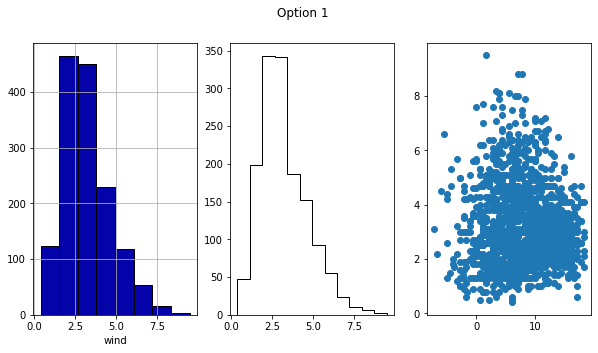

In [ ]:
# Option 1 : Displaying multiple graphs with subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5))
fig.suptitle('Option 1', fontsize='large')

# Histogram of the wind variable with 8 bins. We also change the color of the
# bins and the color of the edges. 
ax1.hist(seattle_weather['wind'], bins=8, color='#0504aa', edgecolor="black")

# change the label of the x-axis and add a grid
ax1.set_xlabel('wind')
ax1.grid()

# different type of histograms (step)
ax2.hist(seattle_weather['wind'], bins=12, histtype = 'step', 
         edgecolor="black")

# Scatter plot of the min temperature and the wind
ax3.scatter(seattle_weather['temp_min'], seattle_weather['wind'])

# Show the plot
plt.show()

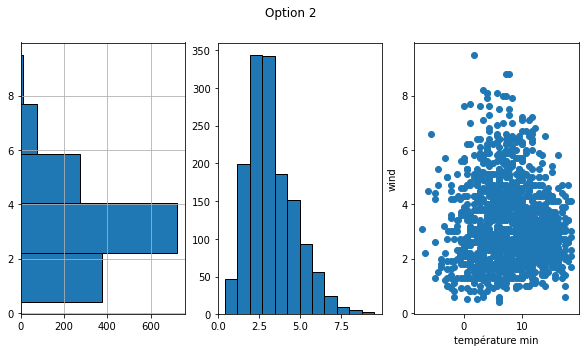

In [ ]:
# Option 2 : Displaying multiple graphs with subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
fig.suptitle('Option 2', fontsize='large')

ax = axs[0]
ax.hist(seattle_weather['wind'], bins=5, orientation = 'horizontal',
        edgecolor="black")
ax.grid()

ax=axs[1]
ax.hist(seattle_weather['wind'], bins=12,
        edgecolor="black")

ax=axs[2]
ax.scatter(seattle_weather['temp_min'], seattle_weather['wind'])
ax.set_xlabel('température min')
ax.set_ylabel('wind')
plt.show()

['sun', 'fog', 'rain', 'drizzle', 'snow']


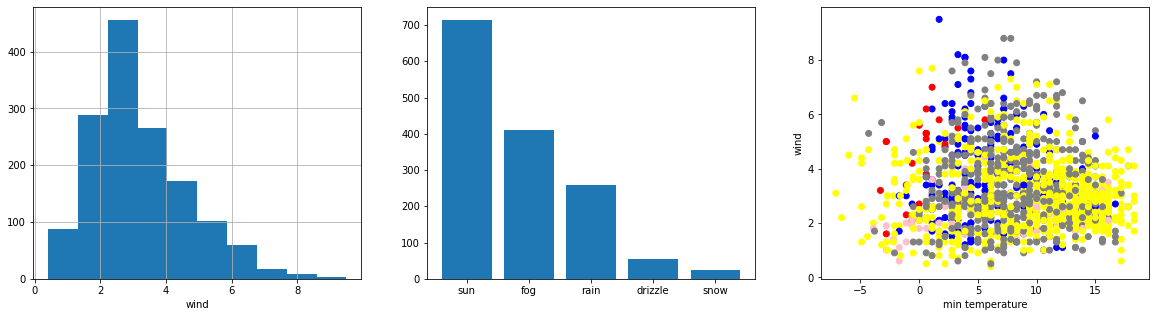

In [ ]:
# Option 3: Displaying multiple graphs with subplots

# Create the figure
fig = plt.figure(figsize=(20,5))

# Add subplots to the figure
# 131 -> (number of rows, number of columns, axe number)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.hist(seattle_weather['wind'])
# change the label of the x-axis and add a grid
ax1.set_xlabel('wind')
ax1.grid()

# a bar chart for categorical variables
count_weather = seattle_weather['weather'].value_counts()
name = count_weather.index.tolist()
print(name)
ax2.bar(name, count_weather)

# let's color the point of the scatter according to the weather
colors = {'sun':'yellow', 'fog':'grey', 'rain':'blue', 'drizzle':'pink', 
          'snow':'red'}
ax3.scatter(seattle_weather['temp_min'], seattle_weather['wind'], marker='o',
            c=seattle_weather['weather'].map(colors))
ax3.set_xlabel('min temperature')
ax3.set_ylabel('wind')

plt.show()

In [ ]:
# EXERCISE: Make a 2x2 grid plot containing:  
# 1. a pie plot of the weather, 
# 2. a boxplot for the maximum temperature for different weather
# 3. a scatter plot of precipitation and wind (customized ...) 
# 4. color each point of the scatter plot (3.) based on the month of the year


# For the second plot we need to prepare the data as follows
df_sun = seattle_weather.loc[seattle_weather['weather'] == 'sun']
df_fog = seattle_weather.loc[seattle_weather['weather'] == 'fog']
df_snow = seattle_weather.loc[seattle_weather['weather'] == 'snow']
data_box = [df_sun['temp_max'], df_fog['temp_max'], df_snow['temp_max']]

### Seaborn 

Seaborn is a complementary library for Matplolib, which provides a high-level interface to draw statistical graphics.

First, Seaborn works with different parameters, which undoubtedly speaks to those users that don’t use the default looks of the Matplotlib plots.

Rmq : seaborn intègre des stats de type intervalle de confiance dans la barplots
https://seaborn.pydata.org/tutorial/categorical.html

Changer le thème : https://seaborn.pydata.org/generated/seaborn.set.html?highlight=set#seaborn.set

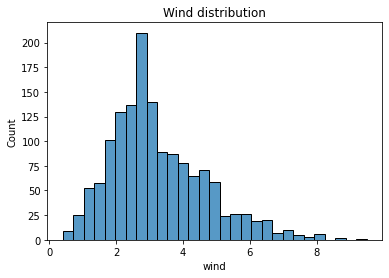

In [ ]:
# Import the package
import seaborn as sns

# Using the seattle weather data with default parameter
sns.histplot(seattle_weather['wind']).set_title('Wind distribution');

## Show plot - not required with juptyer notebook
plt.show()

In [ ]:
# Setting seaborn as default style even if use only matplotlib
sns.set() 

The `displot()` module encapsulates the various available functions to visualize the distribution of a variable. The axes-level functions are `histplot()`, `kdeplot()`, `ecdfplot()`, and `rugplot()`. They are grouped together within the figure-level `displot()`, `jointplot()`, and `pairplot()` functions.

The difference, when using `displot()` instead of directly `histplot()` is that the returned object is a `FacetGrid` and not a matplotlib axe. As a result, properties of the graph are accessible in a different way.

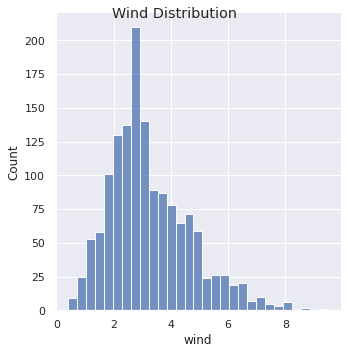

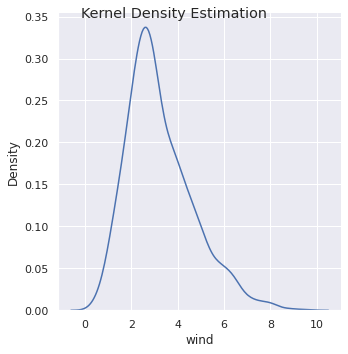

In [ ]:
# Default displot is a histogram
g = sns.displot(seattle_weather['wind']);
g.fig.suptitle('Wind Distribution');

# Same module but using kernel density estimation 
g2 = sns.displot(seattle_weather, x="wind", kind="kde")
g2.fig.suptitle('Kernel Density Estimation');

As stated in the introduction of Seaborn, it is complementary with Matplotlib. Indeed, Seaborn relies on the same anatomy than matplotlib (figure and axes) and as a result subplots for instance works in the same way. 

**Attention** : This is true when the object returned by the seaborn module is an *axe* (not the case for displot of jointplot)

In [ ]:
# Let's play with the theme of the plot 
# palette changes the color palette used, style the background of images
sns.set(palette='pastel', style='whitegrid') 

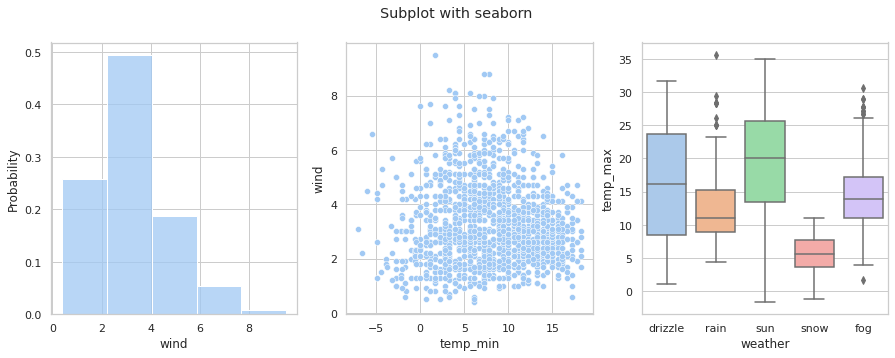

In [ ]:
# Example of subplots with Seaborn

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
fig.suptitle('Subplot with seaborn', fontsize='large')

sns.histplot(ax=axs[0], x=seattle_weather['wind'], bins=5, stat='probability')
sns.scatterplot(ax=axs[1], x=seattle_weather['temp_min'], 
                y=seattle_weather['wind'])
sns.boxplot(ax=axs[2], data=seattle_weather, y='temp_max', x='weather')
plt.show()

Representing joint distribution with seaborn : `jointplot()` and `pairplot()`

Similar to `displot()`, setting a different value for the parameter `kind=` in `jointplot()` will change both the joint and marginal plots :

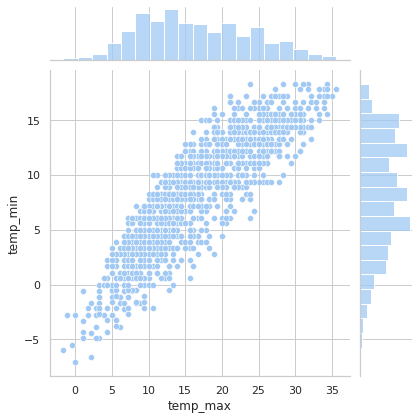

In [ ]:
# Example of jointplot
sns.jointplot(data=seattle_weather, x="temp_max", y="temp_min");

Finally, `pairplot()` allows to create scatter plot for all the quantitative variables detected in the dataframe. Diagonal figures represent the distribution of the variables individually.
It is similar to the `pair` function in R. 

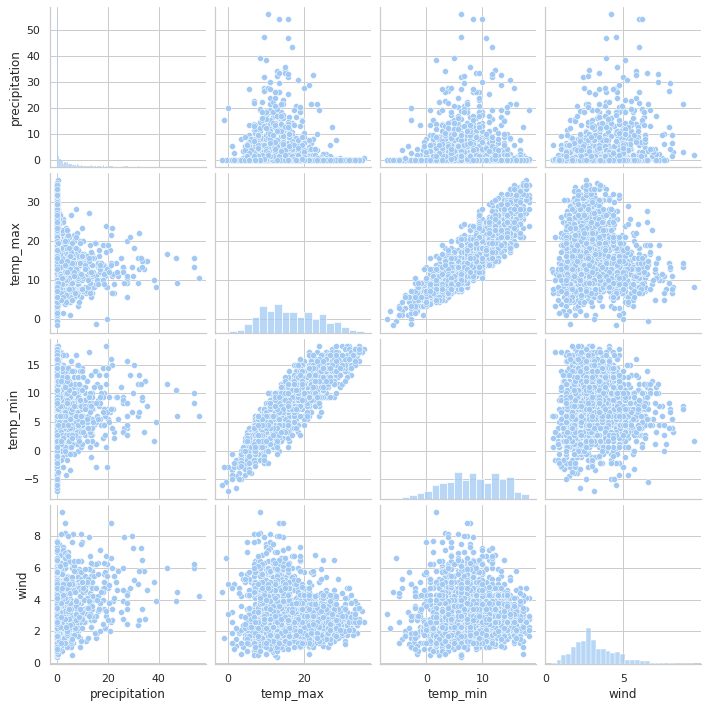

In [ ]:
# Pairplot
sns.pairplot(data=seattle_weather);

In [ ]:
# EXERCISE: Make a 1x3 grid plot containing:  
# 1. a pie plot of the weather, 
# 2. a scatter plot of precipitation and wind (customized ...) 
# 3. color each point of the scatter plot (3.) based on the month of the year

### Pandas 

Pandas is not a library dedicated to visualization. It is meant to handle dataframe, from which you can then easilly called visualization functions. Pandas' visualization function calls matplotlib.pyplot functions. 

In [ ]:
# Import the library
import pandas as pd


SyntaxError: ignored

## Part 2 - Introduction do Plotly

TO DO 

Resources : 
- [Official documentation](https://plotly.com/python/plotly-fundamentals/)
- [Video tutorial](https://www.youtube.com/watch?v=GGL6U0k8WYA)
- [Plotly and Dash](https://medium.com/analytics-vidhya/interactive-visualization-with-plotly-and-dash-f3f840b786fa)



**Plotly express**

In [ ]:
# Import the necessary package
import plotly.express as px

In [ ]:
fig = px.scatter(seattle_weather, x="temp_min", y="wind")
fig.show()

In [ ]:
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 size='petal_length', hover_data=['petal_width'])
fig.show()

In [ ]:
df = px.data.tips()
fig = px.histogram(df, x="total_bill")
fig.show()

In [ ]:
data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(data_canada, x='year', y='pop')
fig.show()

In [ ]:
df = px.data.medals_wide(indexed=True)
fig = px.imshow(df)
fig.show()

AttributeError: ignored

### **Graph objects**

In [ ]:
import plotly.graph_objects as go

In [ ]:
import numpy as np
x0 = np.random.randn(500)
x1 = np.random.randn(500) + 1

fig = go.Figure()
fig.add_trace(go.Histogram(
    x=x0,
    histnorm='percent',
    name='control', # name used in legend and hover labels
    xbins=dict( # bins used for histogram
        start=-4.0,
        end=3.0,
        size=0.5
    ),
    marker_color='#EB89B5',
    opacity=0.75
))
fig.add_trace(go.Histogram(
    x=x1,
    histnorm='percent',
    name='experimental',
    xbins=dict(
        start=-3.0,
        end=4,
        size=0.5
    ),
    marker_color='#330C73',
    opacity=0.75
))

fig.update_layout(
    title_text='Sampled Results', # title of plot
    xaxis_title_text='Value', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)

fig.show()

In [ ]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=months,
    y=[20, 14, 25, 16, 18, 22, 19, 15, 12, 16, 14, 17],
    name='Primary Product',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=months,
    y=[19, 14, 22, 14, 16, 19, 15, 14, 10, 12, 12, 16],
    name='Secondary Product',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [ ]:
df = px.data.iris()
fig = px.scatter_matrix(df,
    dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"],
    color="species", symbol="species",
    title="Scatter matrix of iris data set",
    labels={col:col.replace('_', ' ') for col in df.columns}) # remove underscore
fig.update_traces(diagonal_visible=False)
fig.show()